In [152]:
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Using Pathlib to read the CSV files
whale_csv = Path('./Starter_Code/Resources/whale_returns.csv')
algo__csv = Path('./Starter_Code/Resources/algo_returns.csv')
sp500_csv = Path('./Starter_Code/Resources/sp500_history.csv')

In [3]:
# Using a file path to read the csv file as a dataframe
whale_df = pd.read_csv(whale_csv, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo__csv, index_col = 'Date',infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_csv, index_col= 'Date',infer_datetime_format=True, parse_dates=True)

In [4]:
# Identifying data sets that may require cleansing
whale_df.count() # Needs to be cleansed
algo_df.count() # Needs to be cleansed
sp500_df.count() # Does not need to be cleansed

Close    1649
dtype: int64

In [5]:
# Reading Whale Returns & Algorithmic Returns
whale_df.head()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Counting null values
whale_df.isnull().sum() 
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Dropping null values
whale_df.dropna(inplace=True)
algo_df.dropna(inplace=True)

In [8]:
# Converting sp500 Close column to a float
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '', regex=True)
sp500_df['Close'] = sp500_df['Close'].astype(float)

In [9]:
# Calculating Daily Returns of sp500 & dropping null values
sp500_df=sp500_df.pct_change().dropna()

In [10]:
# Renaming 'Close' column for sp500
sp_column=['S&P 500']
sp500_df.columns = sp_column
sp500_df

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [55]:
# Combining the Dataframes
combined_portfolios = pd.concat([algo_df,whale_df,sp500_df], axis='columns', join='inner')
combined_portfolios

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577


<AxesSubplot:xlabel='Date'>

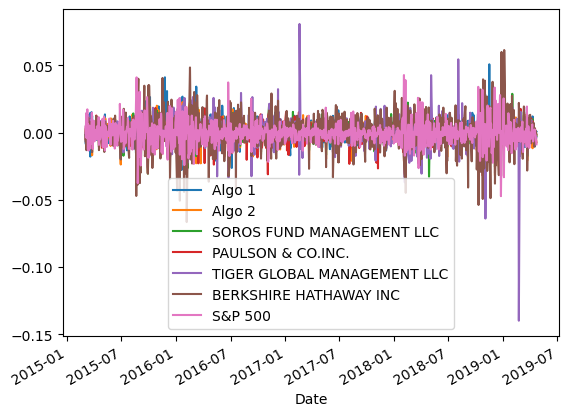

In [57]:
# Plotting Daily Returns
combined_portfolios.plot() #Note: All data is already in a daily return format

<AxesSubplot:xlabel='Date'>

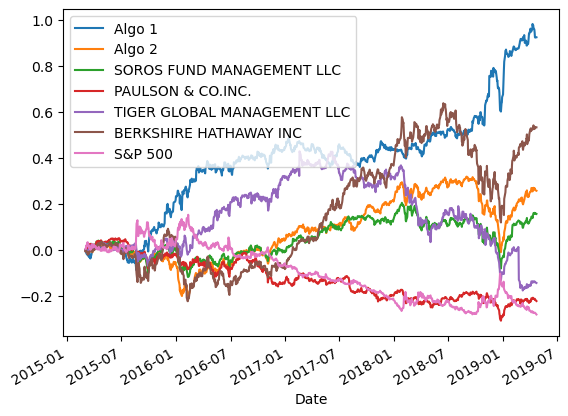

In [61]:
# Calculating & Plotting Cumulative Returns
cumulative_returns = (1 + combined_portfolios).cumprod()-1
cumulative_returns.plot()

In [69]:
combined_portfolios.columns

Index(['Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500'],
      dtype='object')

<AxesSubplot:>

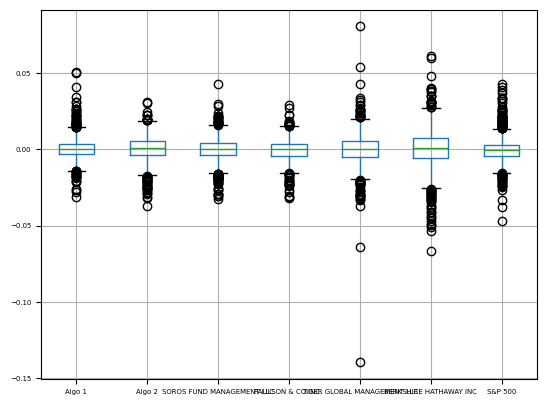

In [109]:
# Creating a box plot for each portfolio
combined_portfolios.boxplot(column=['Algo 1','Algo 2','SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500'], fontsize=(5))

In [110]:
#Calculating the Standard Deviation of the portfolios
combined_portfolios.std()

Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
dtype: float64

In [122]:
#Calculating the SD of S&P 500 
combined_portfolios['S&P 500'].std()
# With the SD presented below, we can ascertain that Algo 1, Algo 2, the Soros fund, and Paulson portfolios are less risky than the S&P 500

0.00858688974707399

In [123]:
# Annualized SD of the portfolios
var = combined_portfolios.var()
mean_one = combined_portfolios.mean() + 1

np.sqrt(((var + (mean_one**2))**12) - mean_one**24)

Algo 1                         0.026602
Algo 2                         0.028981
SOROS FUND MANAGEMENT LLC      0.027409
PAULSON & CO.INC.              0.024282
TIGER GLOBAL MANAGEMENT LLC    0.037725
BERKSHIRE HATHAWAY INC         0.045016
S&P 500                        0.029660
dtype: float64

In [128]:
#Calculating the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios.rolling(window=21).std().tail()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2019-04-15,0.005496,0.007572,0.006804,0.006225,0.007525,0.009729,0.006532
2019-04-16,0.005760,0.007053,0.006711,0.006224,0.007532,0.009731,0.006571
2019-04-17,0.006229,0.007165,0.006773,0.006370,0.007574,0.009485,0.006505
2019-04-18,0.005834,0.007172,0.006633,0.006303,0.007328,0.009475,0.006137
2019-04-22,0.005831,0.007113,0.005915,0.006400,0.006197,0.009104,0.004302


<AxesSubplot:xlabel='Date'>

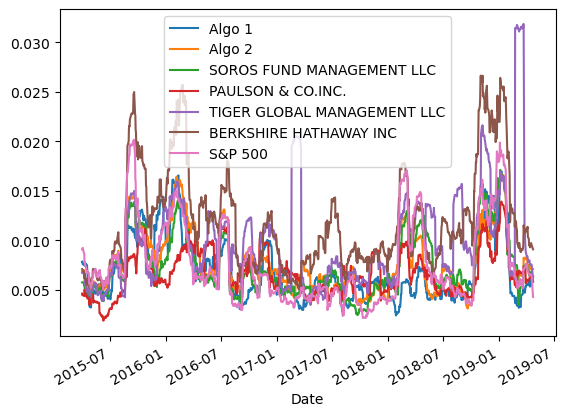

In [125]:
#Plotting the rolling SD
combined_portfolios.rolling(window=21).std().plot()

In [129]:
#Calculating the correlation
combined_portfolios.corr()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Algo 1,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678,-0.033963
Algo 2,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756,-0.002192
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157,0.000574
PAULSON & CO.INC.,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125,-0.001505
BERKSHIRE HATHAWAY INC,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000,-0.013856
S&P 500,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000


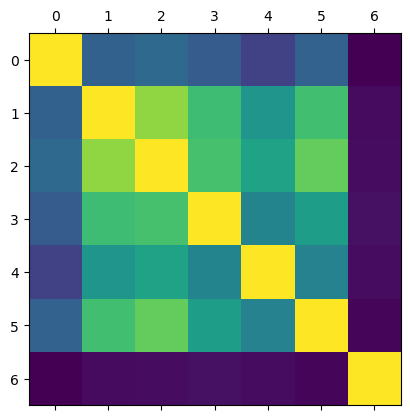

In [133]:
#Displaying the de correlation matrix
plt.matshow(combined_portfolios.corr())

In [145]:
#Calculating covariance of Alg 1
covariance_algo1 = combined_portfolios['Algo 1'].cov(combined_portfolios['Algo 1'])
covariance_algo1

5.81054158681877e-05

In [147]:
#Calculating variance of S&P 500
variance_sp = combined_portfolios['S&P 500'].var()
variance_sp

7.373467552840441e-05

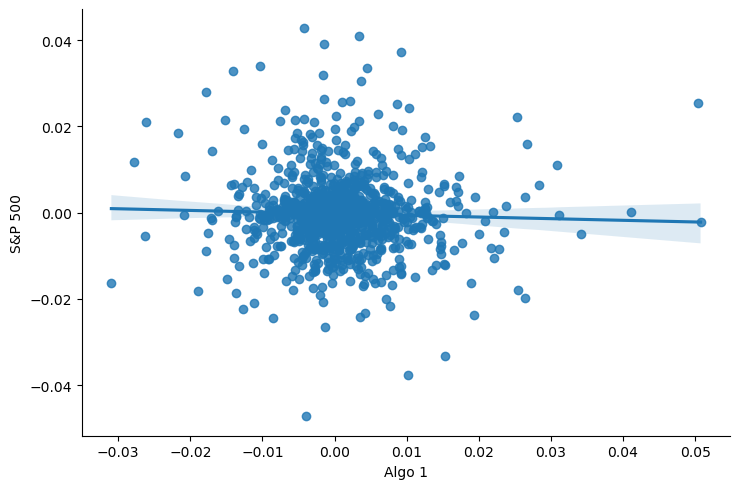

In [153]:
# Computing Beta
#Getting the covariance of the S&P & variance of Algo 1
covariance_sp= combined_portfolios['S&P 500'].cov(combined_portfolios['S&P 500'])
variance_algo=combined_portfolios['Algo 1'].var()
# Now calculating both Beta's
beta_sp= covariance_sp / variance_sp
beta_algo= covariance_algo1 / variance_algo
#Plotting the Beta
sns.lmplot(x='Algo 1', y='S&P 500', data=combined_portfolios, aspect=1.5, fit_reg= True)